## Genesis Set Permission Tree Data Collection
### Using https://github.com/0L-Analytics/permission-tree-monitoring API for Permission Tree of Validators on 0L
#### Credit to: https://github.com/0L-Analytics/permission-tree-monitoring/commits?author=agouin for building the API

### Shows relationship of Genesis Set to their first generation validators

In [1]:
import requests
import pandas as pd
import csv
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

### Get Account addresses into a list

In [2]:
def load_addresses_list(path) -> list:
    all_addresses = []
    with open(path) as f:
        reader = csv.reader(f)
        for row in reader:
            all_addresses.append(row[0])
    return all_addresses

In [3]:
path = 'address.csv'
all_addresses = load_addresses_list(path)
all_addresses

['E57CF27B3381574151B4FCEA65BDA0D2',
 'E8A1BF5E60FA00C2B792098B12FDE964',
 'B5B5BA58B8E9916FE449D1F989383834',
 'EA10EA06C0FDAB689DA9DCF78FC90F4E',
 'BDB8AD37341CEC0817FD8E2474E25031',
 '44BFFCEB6AC69D098959E4F463FB7005',
 '252F0B551C80CD9E951D82C6F70792AE',
 'D0D62AE27A4E84B559DA089A1B15A79F',
 '34E5ADDEC49DED4CC638DAD8CD992858',
 '5ABEDEC612EA01B9F6F2EAAD7187BFEF',
 'E4E9FB27D7A8150162614EBDD282E195',
 'D1C9CE9308B0BDC6DC2BA6A7B5DA8C2B',
 'CCB020E30B1C014F45664761F0B740C7',
 'C0A1F4D49658CF2FE5402E10F496BB80',
 '7E56B29CB23A49368BE593E5CFC9712E',
 '46A7A744B5D33C47F6B20766F8088B10',
 '7EC16859C24200D8E074809D252AC740',
 '64B21681CE1C34854498ED92D76432A2',
 'ECAF65ADD1B785B0495E3099F4045EC0',
 '304A03C0B4ACDFDCE54BFAF39D4E0448',
 'B1471DC5764695ABB4CADF16E26BD4C7',
 'D67F3FF22BD719EB5BE2DF6577C9B42D',
 '8421CB22E56F687395F5973BBF0CBDFB']

### Get Permission Tree for the addresses

In [4]:
def get_permission_tree(account_list):
    web_address = "https://0l.interblockcha.in:444/permission-tree/validator/"
    genesis_dict = {}
    for account in account_list:
        # print(web_address+account)
        response = requests.get(web_address+account)
        genesis_dict[str(account)] = response.json()
        # print(response.json())

    return genesis_dict

In [5]:
all_addresses[0]

'E57CF27B3381574151B4FCEA65BDA0D2'

In [6]:
genesis_tree = get_permission_tree(all_addresses)

In [7]:
genesis_tree

{'E57CF27B3381574151B4FCEA65BDA0D2': {'address': 'e57cf27b3381574151b4fcea65bda0d2',
  'parent': 'd0d62ae27a4e84b559da089a1b15a79f',
  'epoch_onboarded': 20,
  'version_onboarded': 5021771,
  'children': []},
 'E8A1BF5E60FA00C2B792098B12FDE964': {'address': 'e8a1bf5e60fa00c2b792098b12fde964',
  'parent': 'c0a1f4d49658cf2fe5402e10f496bb80',
  'epoch_onboarded': 16,
  'version_onboarded': 3596612,
  'children': [{'address': '59c6262930e3ebb3398d5b88790c090c',
    'parent': 'e8a1bf5e60fa00c2b792098b12fde964',
    'epoch_onboarded': 38,
    'version_onboarded': 9628061}]},
 'B5B5BA58B8E9916FE449D1F989383834': {'address': 'b5b5ba58b8e9916fe449d1f989383834',
  'parent': '8421cb22e56f687395f5973bbf0cbdfb',
  'epoch_onboarded': 18,
  'version_onboarded': 4336088,
  'children': []},
 'EA10EA06C0FDAB689DA9DCF78FC90F4E': {'address': 'ea10ea06c0fdab689da9dcf78fc90f4e',
  'parent': 'ccb020e30b1c014f45664761f0b740c7',
  'epoch_onboarded': 16,
  'version_onboarded': 3637438,
  'children': [{'address'

In [8]:
with open('almost_genesis.json', 'w') as outfile:
    json.dump(genesis_tree, outfile)

## TODO:
- [ x ] Write test for existing set of keys to confirm they are genesis (is not listed as a child in any other)

        if parent is '00000000000000000000000000000000' then genesis

- [ ] Create networkx object to show parent-child relationship at current epoch

- [ ] Create viz to show genesis parent-child relationship change at each epoch

- [ ] Would only show genesis-child, need to then query API to 2nd generation child to 3rd generation child relationship


In [9]:
len(genesis_tree)

23

In [10]:
# for keys, values in genesis_tree.items():
#     if values['children']:
#         print('yes')
        # genesis_only = [x for x in genesis_tree.values()['children'] != []]

## Filter superset of addresses for genesis set only
### Puts into a list and loses the extra address key

In [11]:
genesis_only = [values for values in genesis_tree.values() if values['parent']=='00000000000000000000000000000000']

In [12]:
genesis_only

[{'address': 'bdb8ad37341cec0817fd8e2474e25031',
  'parent': '00000000000000000000000000000000',
  'epoch_onboarded': 0,
  'version_onboarded': 0,
  'children': [{'address': 'e985cbb111a6e7210f1f07aa1f8a75dd',
    'parent': 'bdb8ad37341cec0817fd8e2474e25031',
    'epoch_onboarded': 23,
    'version_onboarded': 5850341}]},
 {'address': '44bffceb6ac69d098959e4f463fb7005',
  'parent': '00000000000000000000000000000000',
  'epoch_onboarded': 0,
  'version_onboarded': 0,
  'children': [{'address': 'a6be3ad55806f2f65cd1776322aede1a',
    'parent': '44bffceb6ac69d098959e4f463fb7005',
    'epoch_onboarded': 21,
    'version_onboarded': 5218882},
   {'address': '9401af0f29d2afd49b8e48a0c361f661',
    'parent': '44bffceb6ac69d098959e4f463fb7005',
    'epoch_onboarded': 41,
    'version_onboarded': 10126552}]},
 {'address': '252f0b551c80cd9e951d82c6f70792ae',
  'parent': '00000000000000000000000000000000',
  'epoch_onboarded': 0,
  'version_onboarded': 0,
  'children': [{'address': 'd340c54f3a05c

In [13]:
with open('genesis_only.json', 'w') as outfile:
    json.dump(genesis_only, outfile)

In [14]:
len(genesis_only)

19

### Puts into a list and but preserves the extra address key

In [15]:
genesis_only_key = [[keys, values] for [keys,values] in genesis_tree.items() if values['parent']=='00000000000000000000000000000000']

In [16]:
genesis_only_key

[['BDB8AD37341CEC0817FD8E2474E25031',
  {'address': 'bdb8ad37341cec0817fd8e2474e25031',
   'parent': '00000000000000000000000000000000',
   'epoch_onboarded': 0,
   'version_onboarded': 0,
   'children': [{'address': 'e985cbb111a6e7210f1f07aa1f8a75dd',
     'parent': 'bdb8ad37341cec0817fd8e2474e25031',
     'epoch_onboarded': 23,
     'version_onboarded': 5850341}]}],
 ['44BFFCEB6AC69D098959E4F463FB7005',
  {'address': '44bffceb6ac69d098959e4f463fb7005',
   'parent': '00000000000000000000000000000000',
   'epoch_onboarded': 0,
   'version_onboarded': 0,
   'children': [{'address': 'a6be3ad55806f2f65cd1776322aede1a',
     'parent': '44bffceb6ac69d098959e4f463fb7005',
     'epoch_onboarded': 21,
     'version_onboarded': 5218882},
    {'address': '9401af0f29d2afd49b8e48a0c361f661',
     'parent': '44bffceb6ac69d098959e4f463fb7005',
     'epoch_onboarded': 41,
     'version_onboarded': 10126552}]}],
 ['252F0B551C80CD9E951D82C6F70792AE',
  {'address': '252f0b551c80cd9e951d82c6f70792ae',
  

In [17]:
genesis_only_key[0]

['BDB8AD37341CEC0817FD8E2474E25031',
 {'address': 'bdb8ad37341cec0817fd8e2474e25031',
  'parent': '00000000000000000000000000000000',
  'epoch_onboarded': 0,
  'version_onboarded': 0,
  'children': [{'address': 'e985cbb111a6e7210f1f07aa1f8a75dd',
    'parent': 'bdb8ad37341cec0817fd8e2474e25031',
    'epoch_onboarded': 23,
    'version_onboarded': 5850341}]}]

In [18]:
G = nx.DiGraph()
for node in genesis_only:
    for keys, values in node.items():       
        G.add_node(node['address'], children = node['children'], epoch_onboarded = 0) # epoch_onboarded = values['epoch_onboarded']) not true for genesis
        # print(G)
    
# from_dict_of_dicts(genesis_tree)

In [19]:
print(G.nodes['7e56b29cb23a49368be593e5cfc9712e'])

{'children': [{'address': '0ef85e1723530edd76f2bb13614ac5c5', 'parent': '7e56b29cb23a49368be593e5cfc9712e', 'epoch_onboarded': 37, 'version_onboarded': 9271787}], 'epoch_onboarded': 0}


In [20]:
G.nodes['7e56b29cb23a49368be593e5cfc9712e']['children']

[{'address': '0ef85e1723530edd76f2bb13614ac5c5',
  'parent': '7e56b29cb23a49368be593e5cfc9712e',
  'epoch_onboarded': 37,
  'version_onboarded': 9271787}]

In [21]:
G.nodes['ccb020e30b1c014f45664761f0b740c7']['children']

[{'address': 'ea10ea06c0fdab689da9dcf78fc90f4e',
  'parent': 'ccb020e30b1c014f45664761f0b740c7',
  'epoch_onboarded': 16,
  'version_onboarded': 3637438},
 {'address': '9d0a8f2f51a2cb0d4eceeb1fd269431d',
  'parent': 'ccb020e30b1c014f45664761f0b740c7',
  'epoch_onboarded': 31,
  'version_onboarded': 7958699}]

In [22]:
C = nx.DiGraph()
print('Genesis Child Count')
for node in G:
    C.add_node(node, data=True)
    print(node)
    if 'children' in G.nodes[node]:
        print(node, '  ',len(G.nodes[node]['children']))
        for child in G.nodes[node]['children']:
            C.add_node(child['address'])
            C.add_node(child['address'], epoch_onboarded= child['epoch_onboarded'])
            C.add_edge(node,child['address'])
            print(child)
    else:
        print('0')

Genesis Child Count
bdb8ad37341cec0817fd8e2474e25031
bdb8ad37341cec0817fd8e2474e25031    1
{'address': 'e985cbb111a6e7210f1f07aa1f8a75dd', 'parent': 'bdb8ad37341cec0817fd8e2474e25031', 'epoch_onboarded': 23, 'version_onboarded': 5850341}
44bffceb6ac69d098959e4f463fb7005
44bffceb6ac69d098959e4f463fb7005    2
{'address': 'a6be3ad55806f2f65cd1776322aede1a', 'parent': '44bffceb6ac69d098959e4f463fb7005', 'epoch_onboarded': 21, 'version_onboarded': 5218882}
{'address': '9401af0f29d2afd49b8e48a0c361f661', 'parent': '44bffceb6ac69d098959e4f463fb7005', 'epoch_onboarded': 41, 'version_onboarded': 10126552}
252f0b551c80cd9e951d82c6f70792ae
252f0b551c80cd9e951d82c6f70792ae    2
{'address': 'd340c54f3a05c06835b1401c3575b70d', 'parent': '252f0b551c80cd9e951d82c6f70792ae', 'epoch_onboarded': 21, 'version_onboarded': 5306913}
{'address': '987d7486a6db70993eeab79124bc6606', 'parent': '252f0b551c80cd9e951d82c6f70792ae', 'epoch_onboarded': 37, 'version_onboarded': 9325961}
d0d62ae27a4e84b559da089a1b15a79

In [23]:
H = nx.compose(G,C)

In [25]:
print(C.nodes['b295da228c6808199d92dc813975755c'])

{'epoch_onboarded': 35}


In [ ]:
# for node in H:
#     if 'children' in H.nodes[node]:
#         for child in H.nodes[node]['children']:
#             child_node = H.nodes[child]
#             print(child_node)
#             # H.add_edge(node, child_node) #child['address'], epoch_onboarded= child['epoch_onboarded'])
#             # print('yo')

In [26]:
def draw_net(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_edges(G, pos, width=4)
    # nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
    # plt.axis('off')
    return plt.show()

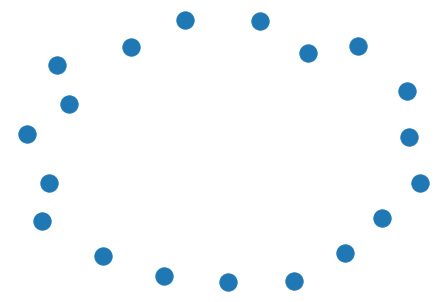

In [27]:
nx.draw(G)

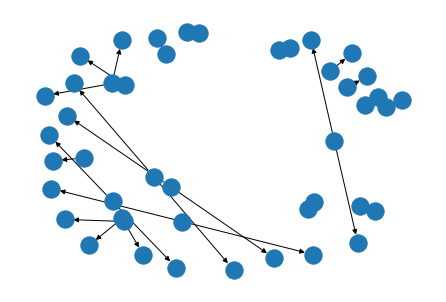

In [28]:
nx.draw(H)

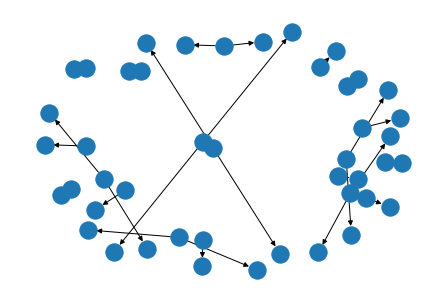

In [29]:
nx.draw(C)

In [33]:
color_map = ['red' if H.nodes[node]['epoch_onboarded'] == 0 else 'green' for node in H]    


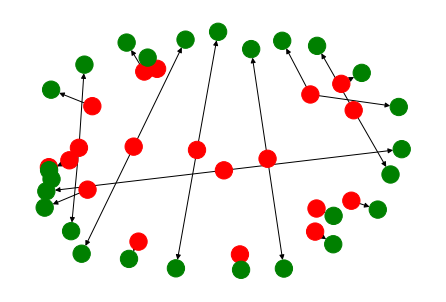

In [34]:
graph = nx.draw(H, node_color=color_map)

In [35]:
epoch_onboarded=nx.get_node_attributes(H,'epoch_onboarded')

In [36]:
print(epoch_onboarded)

{'bdb8ad37341cec0817fd8e2474e25031': 0, '44bffceb6ac69d098959e4f463fb7005': 0, '252f0b551c80cd9e951d82c6f70792ae': 0, 'd0d62ae27a4e84b559da089a1b15a79f': 0, '34e5addec49ded4cc638dad8cd992858': 0, '5abedec612ea01b9f6f2eaad7187bfef': 0, 'e4e9fb27d7a8150162614ebdd282e195': 0, 'd1c9ce9308b0bdc6dc2ba6a7b5da8c2b': 0, 'ccb020e30b1c014f45664761f0b740c7': 0, 'c0a1f4d49658cf2fe5402e10f496bb80': 0, '7e56b29cb23a49368be593e5cfc9712e': 0, '46a7a744b5d33c47f6b20766f8088b10': 0, '7ec16859c24200d8e074809d252ac740': 0, '64b21681ce1c34854498ed92d76432a2': 0, 'ecaf65add1b785b0495e3099f4045ec0': 0, '304a03c0b4acdfdce54bfaf39d4e0448': 0, 'b1471dc5764695abb4cadf16e26bd4c7': 0, 'd67f3ff22bd719eb5be2df6577c9b42d': 0, '8421cb22e56f687395f5973bbf0cbdfb': 0, 'e985cbb111a6e7210f1f07aa1f8a75dd': 23, 'a6be3ad55806f2f65cd1776322aede1a': 21, '9401af0f29d2afd49b8e48a0c361f661': 41, 'd340c54f3a05c06835b1401c3575b70d': 21, '987d7486a6db70993eeab79124bc6606': 37, 'e57cf27b3381574151b4fcea65bda0d2': 20, 'c051bd516ca491cdf

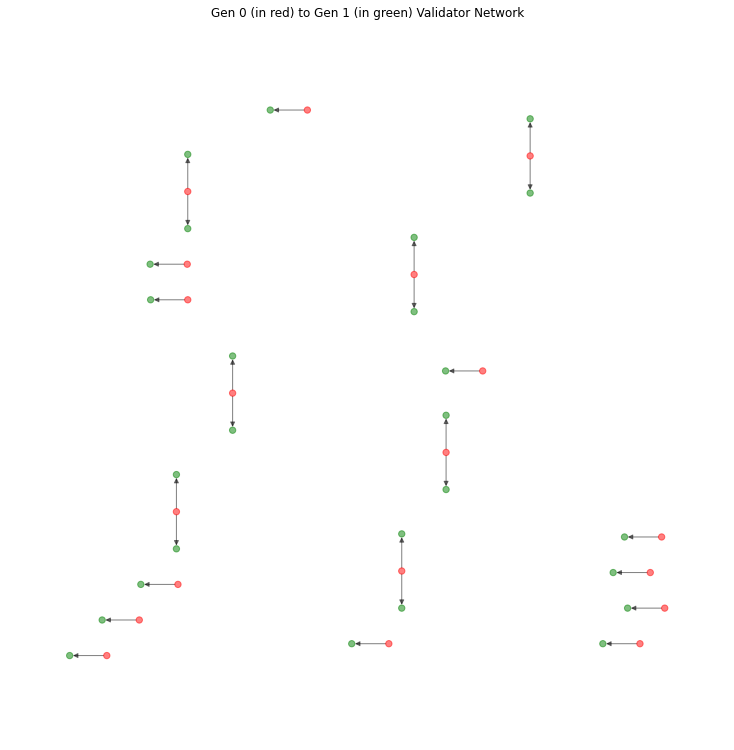

In [64]:
pos = nx.nx_agraph.graphviz_layout(H, prog="twopi", args="")
plt.figure(figsize=(10, 10))
nx.draw(H, pos, node_size=40, alpha=0.5, node_color=color_map, with_labels=False)
plt.axis("equal")
plt.title('Gen 0 (in red) to Gen 1 (in green) Validator Network')
plt.show()